In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel


from sklearn.svm import SVC
%matplotlib inline

In [4]:
df = pd.read_csv('dfMac.csv')

In [5]:
df.columns

Index(['isIoT', 'Mac src', 'Mac dst', 'Flow ID', 'Src IP', 'Src Port',
       'Dst IP', 'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
 

In [6]:
df

,isIoT,Mac src,Mac dst,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,1,ec:1a:59:83:28:11,ec:1a:59:79:f4:89,192.168.1.193-192.168.1.223-4425-49153-6,192.168.1.193,4425,192.168.1.223,49153,6,22/09/2016 11:00:07 da manhã,...,32,0,0,0,0,1.474553e+15,1.846140e+03,1.474553e+15,1.474553e+15,NeedManualLabel
1,1,ec:1a:59:83:28:11,ec:1a:59:79:f4:89,192.168.1.193-192.168.1.223-4425-49153-6,192.168.1.193,4425,192.168.1.223,49153,6,22/09/2016 11:00:07 da manhã,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NeedManualLabel
2,1,ec:1a:59:83:28:11,ec:1a:59:79:f4:89,192.168.1.193-192.168.1.223-4426-49153-6,192.168.1.193,4426,192.168.1.223,49153,6,22/09/2016 11:00:07 da manhã,...,32,0,0,0,0,1.474553e+15,1.817797e+03,1.474553e+15,1.474553e+15,NeedManualLabel
3,1,ec:1a:59:83:28:11,ec:1a:59:79:f4:89,192.168.1.193-192.168.1.223-4426-49153-6,192.168.1.193,4426,192.168.1.223,49153,6,22/09/2016 11:00:07 da manhã,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NeedManualLabel
4,1,ec:1a:59:83:28:11,00:16:6c:ab:6b:88,192.168.1.193-192.168.1.249-4977-49152-6,192.168.1.193,4977,192.168.1.249,49152,6,22/09/2016 11:00:07 da manhã,...,32,0,0,0,0,1.474553e+15,2.305375e+03,1.474553e+15,1.474553e+15,NeedManualLabel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642573,0,74:2f:68:81:69:42,14:cc:20:51:33:ea,192.168.1.208-192.168.1.1-56733-53-17,192.168.1.208,56733,192.168.1.1,53,17,05/10/2016 07:45:41 da manhã,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NeedManualLabel
642574,0,08:21:ef:3b:fc:e3,14:cc:20:51:33:ea,192.168.1.239-52.74.243.48-38280-443-6,192.168.1.239,38280,52.74.243.48,443,6,05/10/2016 04:35:46 da manhã,...,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NeedManualLabel
642575,1,14:cc:20:51:33:ea,00:16:6c:ab:6b:88,23.12.64.41-192.168.1.249-80-44315-6,23.12.64.41,80,192.168.1.249,44315,6,05/10/2016 06:38:46 da manhã,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NeedManualLabel
642576,1,ec:1a:59:79:f4:89,ec:1a:59:83:28:11,192.168.1.223-192.168.1.193-4119-49153-6,192.168.1.223,4119,192.168.1.193,49153,6,04/10/2016 06:26:18 da tarde,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NeedManualLabel


In [7]:
AmazonEcho1 = df[df['Mac dst'] == '44:65:0d:56:cc:d3']
AmazonEcho2 = df[df['Mac src'] == '44:65:0d:56:cc:d3']

In [8]:
AmazonEcho = pd.concat([AmazonEcho1,AmazonEcho2],ignore_index=True)

In [9]:
AmazonEcho['Dispositivo'] = 'Amazon Echo'

In [10]:
AmazonEcho['Label'] = '1'

In [11]:
AmazonEcho

,isIoT,Mac src,Mac dst,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Dispositivo
0,1,14:cc:20:51:33:ea,44:65:0d:56:cc:d3,54.239.29.231-192.168.1.240-443-46369-6,54.239.29.231,443,192.168.1.240,46369,6,22/09/2016 11:00:20 da manhã,...,0,0,0,0,1.474553e+15,3.640201e+07,1.474553e+15,1.474553e+15,1,Amazon Echo
1,1,14:cc:20:51:33:ea,44:65:0d:56:cc:d3,54.239.29.231-192.168.1.240-443-46369-6,54.239.29.231,443,192.168.1.240,46369,6,22/09/2016 11:02:20 da manhã,...,0,0,0,0,1.474553e+15,3.786708e+07,1.474553e+15,1.474553e+15,1,Amazon Echo
2,1,14:cc:20:51:33:ea,44:65:0d:56:cc:d3,54.239.29.231-192.168.1.240-443-46369-6,54.239.29.231,443,192.168.1.240,46369,6,22/09/2016 11:04:21 da manhã,...,0,0,0,0,1.361126e+15,4.089674e+14,1.474553e+15,2.978070e+07,1,Amazon Echo
3,1,14:cc:20:51:33:ea,44:65:0d:56:cc:d3,54.239.29.231-192.168.1.240-443-46369-6,54.239.29.231,443,192.168.1.240,46369,6,22/09/2016 11:06:21 da manhã,...,0,0,0,0,1.474553e+15,4.681249e+07,1.474553e+15,1.474553e+15,1,Amazon Echo
4,1,14:cc:20:51:33:ea,44:65:0d:56:cc:d3,54.239.29.231-192.168.1.240-443-46369-6,54.239.29.231,443,192.168.1.240,46369,6,22/09/2016 11:08:50 da manhã,...,0,0,0,0,1.474553e+15,3.178739e+07,1.474553e+15,1.474553e+15,1,Amazon Echo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88942,1,44:65:0d:56:cc:d3,14:cc:20:51:33:ea,192.168.1.240-8.8.8.8-58183-53-17,192.168.1.240,58183,8.8.8.8,53,17,05/10/2016 12:40:40 da manhã,...,0,0,0,0,1.475639e+15,1.332896e+03,1.475639e+15,1.475639e+15,1,Amazon Echo
88943,1,44:65:0d:56:cc:d3,14:cc:20:51:33:ea,192.168.1.240-8.8.8.8-54812-53-17,192.168.1.240,54812,8.8.8.8,53,17,04/10/2016 04:55:11 da tarde,...,0,0,0,0,1.475611e+15,1.311683e+03,1.475611e+15,1.475611e+15,1,Amazon Echo
88944,1,44:65:0d:56:cc:d3,14:cc:20:51:33:ea,192.168.1.240-8.8.8.8-53235-53-17,192.168.1.240,53235,8.8.8.8,53,17,04/10/2016 06:05:32 da tarde,...,0,0,0,0,1.475615e+15,1.293298e+03,1.475615e+15,1.475615e+15,1,Amazon Echo
88945,1,44:65:0d:56:cc:d3,14:cc:20:51:33:ea,192.168.1.240-72.21.192.213-41649-123-17,192.168.1.240,41649,72.21.192.213,123,17,04/10/2016 01:53:36 da tarde,...,0,0,0,0,1.475600e+15,4.405231e+07,1.475600e+15,1.475600e+15,1,Amazon Echo


In [12]:
AugustDoorbell1 = df[df['Mac dst'] == 'e0:76:d0:3f:00:ae']
AugustDoorbell2 = df[df['Mac src'] == 'e0:76:d0:3f:00:ae']

In [13]:
AugustDoorbell1
AugustDoorbell2

,isIoT,Mac src,Mac dst,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [14]:
Awairairmonitor1 = df[df['Mac dst'] == '70:88:6b:10:0f:c6']
Awairairmonitor2 = df[df['Mac src'] == '70:88:6b:10:0f:c6']

In [15]:
Awairairmonitor1
Awairairmonitor2

,isIoT,Mac src,Mac dst,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [16]:
BelkinCamera1 = df[df['Mac dst'] == 'b4:75:0e:ec:e5:a9']
BelkinCamera2 = df[df['Mac src'] == 'b4:75:0e:ec:e5:a9']

In [17]:
BelkinCamera1
BelkinCamera2

,isIoT,Mac src,Mac dst,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [18]:
BelkinMotion1 = df[df['Mac dst'] == 'ec:1a:59:83:28:11']
BelkinMotion2 = df[df['Mac src'] == 'ec:1a:59:83:28:11']

In [19]:
BelkinMotion = pd.concat([BelkinMotion1,BelkinMotion2],ignore_index=True) 

In [20]:
BelkinMotion['Dispositivo'] = 'Belkin Motion Sensor'

In [21]:
BelkinMotion['Label'] = '2'

In [22]:
BelkinSwitch1 = df[df['Mac dst'] == 'ec:1a:59:79:f4:89']
BelkinSwitch2 = df[df['Mac src'] == 'ec:1a:59:79:f4:89']

In [23]:
BelkinSwitch = pd.concat([BelkinSwitch1,BelkinSwitch2],ignore_index=True) 
BelkinSwitch['Dispositivo'] = 'Belkin Switch'
BelkinSwitch['Label'] = '3'

In [24]:
BlipcareMeter1 = df[df['Mac dst'] == '74:6a:89:00:2e:25']
BlipcareMeter2 = df[df['Mac src'] == '74:6a:89:00:2e:25']

In [25]:
BlipcareMeter = pd.concat([BlipcareMeter1,BlipcareMeter2],ignore_index=True) 
BlipcareMeter['Dispositivo'] = 'Blipcare BP Meter'
BlipcareMeter['Label'] = '4'

In [26]:
CanaryCamera1 = df[df['Mac dst'] == '7c:70:bc:5d:5e:dc']
CanaryCamera2 = df[df['Mac src'] == '7c:70:bc:5d:5e:dc']

In [27]:
CanaryCamera1
CanaryCamera2

,isIoT,Mac src,Mac dst,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [28]:
Dropcam1 = df[df['Mac dst'] == '30:8c:fb:2f:e4:b2']
Dropcam2 = df[df['Mac src'] == '30:8c:fb:2f:e4:b2']

In [29]:
Dropcam = pd.concat([Dropcam1,Dropcam2],ignore_index=True) 
Dropcam['Dispositivo'] = 'Dropcam'
Dropcam['Label'] = '5'

In [30]:
GoogleChromecast1 = df[df['Mac dst'] == '6c:ad:f8:5e:e4:61']
GoogleChromecast2 = df[df['Mac src'] == '6c:ad:f8:5e:e4:61']

In [31]:
GoogleChromecast1
GoogleChromecast2

,isIoT,Mac src,Mac dst,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [32]:
HelloBarbie1 = df[df['Mac dst'] == '28:c2:dd:ff:a5:2d']
HelloBarbie2 = df[df['Mac src'] == '28:c2:dd:ff:a5:2d']

In [33]:
HelloBarbie1
HelloBarbie2

,isIoT,Mac src,Mac dst,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [34]:
HPPrinter1 = df[df['Mac dst'] == '70:5a:0f:e4:9b:c0']
HPPrinter2 = df[df['Mac src'] == '70:5a:0f:e4:9b:c0']

In [35]:
HPPrinter = pd.concat([HPPrinter1,HPPrinter2],ignore_index=True) 
HPPrinter['Dispositivo'] = 'HP Printer'
HPPrinter['Label'] = '6'

In [36]:
iHomePowerPlug1 = df[df['Mac dst'] == '74:c6:3b:29:d7:1d']
iHomePowerPlug2 = df[df['Mac src'] == '74:c6:3b:29:d7:1d']

In [37]:
iHomePowerPlug = pd.concat([iHomePowerPlug1,iHomePowerPlug2],ignore_index=True) 
iHomePowerPlug['Dispositivo'] = 'iHome PowerPlug'
iHomePowerPlug['Label'] = '7'

In [38]:
LiFXBulb1 = df[df['Mac dst'] == 'd0:73:d5:01:83:08']
LiFXBulb2 = df[df['Mac src'] == 'd0:73:d5:01:83:08']

In [39]:
LiFXBulb = pd.concat([LiFXBulb1,LiFXBulb2],ignore_index=True) 
LiFXBulb['Dispositivo'] = 'LiFX Bulb'
LiFXBulb['Label'] = '8'

In [40]:
NESTSmokeSensor1 = df[df['Mac dst'] == '18:b4:30:25:be:e4']
NESTSmokeSensor2 = df[df['Mac src'] == '18:b4:30:25:be:e4']

In [41]:
NESTSmokeSensor = pd.concat([NESTSmokeSensor1,NESTSmokeSensor2],ignore_index=True) 
NESTSmokeSensor['Dispositivo'] = 'NEST Smoke Sensor'
NESTSmokeSensor['Label'] = '9'

In [42]:
Netatmo2Camera1 = df[df['Mac dst'] == '70:ee:50:18:34:43']
Netatmo2Camera2 = df[df['Mac src'] == '70:ee:50:18:34:43']

In [43]:
Netatmo2Camera = pd.concat([Netatmo2Camera1,Netatmo2Camera2],ignore_index=True) 
Netatmo2Camera['Dispositivo'] = 'Netatmo Camera'
Netatmo2Camera['Label'] = '10'

In [44]:
NetatmoWeather1 = df[df['Mac dst'] == '70:ee:50:03:b8:ac']
NetatmoWeather2 = df[df['Mac src'] == '70:ee:50:03:b8:ac']

In [45]:
NetatmoWeather = pd.concat([NetatmoWeather1,NetatmoWeather2],ignore_index=True) 
NetatmoWeather['Dispositivo'] = 'Netatmo Weather station'
NetatmoWeather['Label'] = '11'

In [46]:
PhillipHueLightbulb1 = df[df['Mac dst'] == '00:17:88:2b:9a:25']
PhillipHueLightbulb2 = df[df['Mac src'] == '00:17:88:2b:9a:25']

In [47]:
PhillipHueLightbulb1
PhillipHueLightbulb2

,isIoT,Mac src,Mac dst,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [48]:
PixstartPhoto1 = df[df['Mac dst'] == 'e0:76:d0:33:bb:85']
PixstartPhoto2 = df[df['Mac src'] == 'e0:76:d0:33:bb:85']

In [49]:
PixstartPhoto = pd.concat([PixstartPhoto1,PixstartPhoto2],ignore_index=True) 
PixstartPhoto['Dispositivo'] = 'Pixstart photo'
PixstartPhoto['Label'] = '12'

In [50]:
RingDoorBell1 = df[df['Mac dst'] == '88:4a:ea:31:66:9d']
RingDoorBell2 = df[df['Mac src'] == '88:4a:ea:31:66:9d']

In [51]:
RingDoorBell1
RingDoorBell2

,isIoT,Mac src,Mac dst,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [52]:
SamsungSmart1 = df[df['Mac dst'] == '00:16:6c:ab:6b:88']
SamsungSmart2 = df[df['Mac src'] == '00:16:6c:ab:6b:88']

In [53]:
SamsungSmart = pd.concat([SamsungSmart1,SamsungSmart2],ignore_index=True) 
SamsungSmart['Dispositivo'] = 'Samsung Smart Cam'
SamsungSmart['Label'] = '13'

In [54]:
SmartThings1 = df[df['Mac dst'] == 'd0:52:a8:00:67:5e']
SmartThings2 = df[df['Mac src'] == 'd0:52:a8:00:67:5e']

In [55]:
SmartThings = pd.concat([SmartThings1,SmartThings2],ignore_index=True) 
SmartThings['Dispositivo'] = 'Smart Things'
SmartThings['Label'] = '14'

In [56]:
TPLinkCamera1 = df[df['Mac dst'] == 'f4:f2:6d:93:51:f1']
TPLinkCamera2 = df[df['Mac src'] == 'f4:f2:6d:93:51:f1']

In [57]:
TPLinkCamera = pd.concat([TPLinkCamera1,TPLinkCamera2],ignore_index=True) 
TPLinkCamera['Dispositivo'] = 'TP-Link Camera'
TPLinkCamera['Label'] = '15'

In [58]:
TPLinkPlug1 = df[df['Mac dst'] == '50:c7:bf:00:56:39']
TPLinkPlug2 = df[df['Mac src'] == '50:c7:bf:00:56:39']

In [59]:
TPLinkPlug = pd.concat([TPLinkPlug1,TPLinkPlug2],ignore_index=True) 
TPLinkPlug['Dispositivo'] = 'TP-Link Camera'
TPLinkPlug['Label'] = '16'

In [60]:
TribySpeaker1 = df[df['Mac dst'] == '18:b7:9e:02:20:44']
TribySpeaker2 = df[df['Mac src'] == '18:b7:9e:02:20:44']

In [61]:
TribySpeaker = pd.concat([TribySpeaker1,TribySpeaker2],ignore_index=True) 
TribySpeaker['Dispositivo'] = 'Triby Speaker'
TribySpeaker['Label'] = '17'

In [62]:
WithingsBabyMonitor1 = df[df['Mac dst'] == '00:24:e4:10:ee:4c']
WithingsBabyMonitor2 = df[df['Mac src'] == '00:24:e4:10:ee:4c']

In [63]:
WithingsBabyMonitor1
WithingsBabyMonitor2

,isIoT,Mac src,Mac dst,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [64]:
WithingsScale1 = df[df['Mac dst'] == '00:24:e4:1b:6f:96']
WithingsScale2 = df[df['Mac src'] == '00:24:e4:1b:6f:96']

In [65]:
WithingsScale = pd.concat([WithingsScale1,WithingsScale2],ignore_index=True) 
WithingsScale['Dispositivo'] = 'Withings Scale'
WithingsScale['Label'] = '18'

In [66]:
WithingsSleepSensor1 = df[df['Mac dst'] == '00:24:e4:20:28:c6']
WithingsSleepSensor2 = df[df['Mac src'] == '00:24:e4:20:28:c6']

In [67]:
WithingsSleepSensor = pd.concat([WithingsSleepSensor1,WithingsSleepSensor2],ignore_index=True) 
WithingsSleepSensor['Dispositivo'] = 'Withings sleep sensor'
WithingsSleepSensor['Label'] = '19'

In [68]:
### Concatenar IoT

In [69]:
DfIoTBenigno = pd.concat([AmazonEcho,BelkinMotion,BelkinSwitch,BlipcareMeter,Dropcam,HPPrinter,iHomePowerPlug,LiFXBulb,NESTSmokeSensor,Netatmo2Camera,NetatmoWeather,PixstartPhoto,SamsungSmart,SmartThings,TPLinkCamera,TribySpeaker,WithingsScale,WithingsSleepSensor],ignore_index=True) 

In [70]:
DfIoTBenigno.to_csv('DfIoTBenigno.csv')

In [71]:
IoT Fluxo Detectado

Amazon Echo 44:65:0 d:56:cc:d3  = Label 1
Belkin Motion Sensor ec:1 a:59:83:28:11  = Label 2
Belkin Switch ec:1 a:59:79:f4:89  = Label 3
Blipcare BP Meter 74:6 a:89:00:2 e:25  = Label 4
Dropcam 30:8 c:fb:2 f:e4:b2  = Label 5
HP Printer 70:5 a:0 f:e4:9 b:c0  = Label 6
iHome PowerPlug 74:c6:3 b:29:d7:1 d  = Label 7
LiFX Bulb d0:73:d5:0 1:83:0 8  = Label 8
NEST Smoke Sensor 18:b4:30:25:be:e4 = Label 9
Netatmo Camera 70:ee:50:18:34:43 = Label 10
Netatmo Weather station 70:ee:50:0 3:b8:ac = Label 11
Pixstart photo frame e0:76:d0:33:bb:85 = Label 12
Samsung Smart Cam 00:16:6 c:ab:6 b:88 = Label 13
Smart Things d0:52:a8:00:67:5 e Physical = Label 14
TP-Link Camera f4:f2:6 d:93:51:f1 = Label  15
TP-Link Plug 50:c7:bf:00:56:39 = Label 16
Triby Speaker 18:b7:9 e:0 2:20:44 = Label 17 
Withings Scale 00:24:e4:1 b:6 f:96 = Label 18
Withings sleep sensor 00:24:e4:20:28:c6 = Label 19


IoT Fluxo Não Encontrado

August Doorbell Cam e0:76:d0:3 f:00:ae  --> SEM FLUXO
Awair air quality monitor 70:88:6 b:10:0 f:c6  --> SEM FLUXO
Belkin Camera b4:75:0 e:ec:e5:a9   --> SEM FLUXO
Canary Camera 7 c:70:bc:5 d:5 e:dc  --> SEM FLUXO
Google Chromecast 6 c:ad:f8:5 e:e4:61  --> SEM FLUXO  
Hello Barbie 28:c2:dd:ff:a5:2 d  --> SEM FLUXO 
Phillip Hue Lightbulb 00:17:88:2 b:9 a:25  --> SEM FLUXO 
Ring Door Bell 88:4 a:ea:31:66:9 d  --> SEM FLUXO 
Withings Baby Monitor 00:24:e4:10:ee:4 c --> SEM FLUXO 
                    


SyntaxError: invalid syntax (2074725565.py, line 1)

In [ ]:
    ### INÍCIO

In [ ]:
DfIoTBenigno = pd.read_csv('DfIoTBenigno.csv')

In [ ]:
DfIoTBenigno.columns

Index(['Unnamed: 0', 'isIoT', 'Mac src', 'Mac dst', 'Flow ID', 'Src IP',
       'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp',
       'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet L

In [ ]:
DfIoTBenigno

,Unnamed: 0,isIoT,Mac src,Mac dst,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Dispositivo
0,0,1,14:cc:20:51:33:ea,44:65:0d:56:cc:d3,54.239.29.231-192.168.1.240-443-46369-6,54.239.29.231,443,192.168.1.240,46369,6,...,0,0,0,0,1.474553e+15,3.640201e+07,1.474553e+15,1.474553e+15,1,Amazon Echo
1,1,1,14:cc:20:51:33:ea,44:65:0d:56:cc:d3,54.239.29.231-192.168.1.240-443-46369-6,54.239.29.231,443,192.168.1.240,46369,6,...,0,0,0,0,1.474553e+15,3.786708e+07,1.474553e+15,1.474553e+15,1,Amazon Echo
2,2,1,14:cc:20:51:33:ea,44:65:0d:56:cc:d3,54.239.29.231-192.168.1.240-443-46369-6,54.239.29.231,443,192.168.1.240,46369,6,...,0,0,0,0,1.361126e+15,4.089674e+14,1.474553e+15,2.978070e+07,1,Amazon Echo
3,3,1,14:cc:20:51:33:ea,44:65:0d:56:cc:d3,54.239.29.231-192.168.1.240-443-46369-6,54.239.29.231,443,192.168.1.240,46369,6,...,0,0,0,0,1.474553e+15,4.681249e+07,1.474553e+15,1.474553e+15,1,Amazon Echo
4,4,1,14:cc:20:51:33:ea,44:65:0d:56:cc:d3,54.239.29.231-192.168.1.240-443-46369-6,54.239.29.231,443,192.168.1.240,46369,6,...,0,0,0,0,1.474553e+15,3.178739e+07,1.474553e+15,1.474553e+15,1,Amazon Echo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539849,539849,1,00:24:e4:20:28:c6,14:cc:20:51:33:ea,192.168.1.156-192.168.1.1-53871-53-17,192.168.1.156,53871,192.168.1.1,53,17,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19,Withings sleep sensor
539850,539850,1,00:24:e4:20:28:c6,14:cc:20:51:33:ea,192.168.1.156-192.168.1.1-39241-53-17,192.168.1.156,39241,192.168.1.1,53,17,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19,Withings sleep sensor
539851,539851,1,00:24:e4:20:28:c6,14:cc:20:51:33:ea,192.168.1.156-192.168.1.1-41091-53-17,192.168.1.156,41091,192.168.1.1,53,17,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19,Withings sleep sensor
539852,539852,1,00:24:e4:20:28:c6,14:cc:20:51:33:ea,192.168.1.156-192.168.1.1-52257-53-17,192.168.1.156,52257,192.168.1.1,53,17,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19,Withings sleep sensor


In [ ]:
## KNN

In [ ]:
def knn(dados):
    #X = dados.drop(['Unnamed: 0', 'isIoT', 'Timestamp','Mac src','Mac dst','Dst IP','Src IP','Flow ID','Dispositivo','Label'], axis=1)
    #y = dados['Label']
    
    X = dados.drop(['Label'], axis=1)
    y = dados['Label']
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    scoreknn = knn.score(X_test,y_test)
    return scoreknn * 100

In [ ]:
knnOriginal = knn(DfIoTBenigno)

ValueError: could not convert string to float: 'ec:1a:59:83:28:11'

In [ ]:
knnOriginal

NameError: name 'knnOriginal' is not defined

In [ ]:
## REGRESSÃO LOGÍSTICA

In [ ]:
def regressao(dados):
    #X = dados.drop(['Unnamed: 0', 'isIoT', 'Timestamp','Mac src','Mac dst','Dst IP','Src IP','Flow ID','Dispositivo','Label'], axis=1)
    #y = dados['Label']
    
    X = dados.drop(['Label'], axis=1)
    y = dados['Label']
    
    min_max_scaler = MinMaxScaler()
    X = min_max_scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    scoreRL = logmodel.score(X_test,y_test)
    return scoreRL*100

In [ ]:
RegressaoOriginal = regressao(DfIoTBenigno)

ValueError: could not convert string to float: '14:cc:20:51:33:ea'

In [ ]:
RegressaoOriginal

63.70795724998878

In [ ]:
### Multi-layer Perceptron classifier

In [ ]:
def mpl(dados):
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import train_test_split

    #X = dados.drop(['Unnamed: 0', 'isIoT', 'Timestamp','Mac src','Mac dst','Dst IP','Src IP','Flow ID','Dispositivo','Label'], axis=1)
    #y = dados['Label']
    
    X = dados.drop(['Label'], axis=1)
    y = dados['Label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)
    clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
    clf.predict_proba(X_test)
    clf.predict(X_test)
    scoreMpl = clf.score(X_test, y_test)
    return scoreMpl * 100

In [ ]:
MplOriginal = mpl(DfIoTBenigno)

ValueError: could not convert string to float: 'ec:1a:59:83:28:11'

In [ ]:
MplOriginal

31.784031297234815

In [ ]:
## SELEÇÃO DE CARACTERÍSTICAS

In [ ]:
### Extra Arvore

In [ ]:
def arvore(dados):
    from sklearn.ensemble import ExtraTreesClassifier
    from sklearn.feature_selection import SelectFromModel
     
    X = dados.drop('Label', axis=1)
    y = dados['Label']
    
    #X = dados.drop(['Unnamed: 0', 'isIoT', 'Timestamp','Mac src','Mac dst','Dst IP','Src IP','Flow ID','Dispositivo','Label'], axis=1)
    #y = dados['Label']
    
    #dados1 = dados.drop(['Unnamed: 0', 'isIoT', 'Timestamp','Mac src','Mac dst','Dst IP','Src IP','Flow ID','Dispositivo','Label'], axis=1)
    clf = ExtraTreesClassifier(n_estimators=50)
    clf = clf.fit(X, y)
    clf.feature_importances_ 
    model = SelectFromModel(clf, prefit=True)
    X_new = model.transform(X)
    ind = model.get_support(indices=True)
    col = dados.columns[ind]
    dfArvore = pd.DataFrame(X_new, columns=col)
    dfArvore['Label'] = dados['Label']
    #sh = dfArvore.shape 
    return dfArvore

In [ ]:
dfArvore = arvore(DfIoTBenigno)

NameError: name 'arvore' is not defined

In [ ]:
dfArvore

,Src Port,Dst Port,Protocol,Flow Duration,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Mean,Flow Packets/s,Flow IAT Mean,...,Subflow Fwd Packets,Subflow Fwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443.0,46369.0,6.0,119999858.0,41.0,23.916667,41.0,22.777778,0.175000,5.999993e+06,...,0.0,13.0,544.0,1734.0,20.0,1.474553e+15,3.640201e+07,1.474553e+15,1.474553e+15,1
1,443.0,46369.0,6.0,119999491.0,41.0,18.222222,41.0,22.777778,0.150001,7.058794e+06,...,0.0,9.0,1734.0,1734.0,20.0,1.474553e+15,3.786708e+07,1.474553e+15,1.474553e+15,1
2,443.0,46369.0,6.0,119745878.0,41.0,20.500000,41.0,20.500000,0.116914,9.211221e+06,...,0.0,11.0,544.0,1734.0,20.0,1.361126e+15,4.089674e+14,1.474553e+15,2.978070e+07,1
3,443.0,46369.0,6.0,119967303.0,41.0,20.500000,100.0,26.307692,0.225061,4.614127e+06,...,0.0,10.0,1734.0,1734.0,20.0,1.474553e+15,4.681249e+07,1.474553e+15,1.474553e+15,1
4,443.0,46369.0,6.0,90233910.0,41.0,24.600000,41.0,17.571429,0.188399,5.639619e+06,...,0.0,14.0,1734.0,1734.0,20.0,1.474553e+15,3.178739e+07,1.474553e+15,1.474553e+15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539849,53871.0,53.0,17.0,284305.0,38.0,38.000000,243.0,243.000000,7.034699,2.843050e+05,...,0.0,19.0,0.0,0.0,8.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19
539850,39241.0,53.0,17.0,330.0,38.0,38.000000,54.0,54.000000,6060.606061,3.300000e+02,...,0.0,19.0,0.0,0.0,8.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19
539851,41091.0,53.0,17.0,345.0,38.0,38.000000,54.0,54.000000,5797.101449,3.450000e+02,...,0.0,19.0,0.0,0.0,8.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19
539852,52257.0,53.0,17.0,335.0,38.0,38.000000,54.0,54.000000,5970.149254,3.350000e+02,...,0.0,19.0,0.0,0.0,8.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19


In [ ]:
knnArvore = knn(dfArvore)

In [ ]:
knnArvore

43.17442284063054

In [ ]:
mplArvore = mpl(dfArvore)

In [ ]:
mplArvore

33.26294419252541

In [ ]:
regressaoaArvore = regressao(dfArvore)

In [ ]:
regressaoaArvore

62.873838070860835

In [ ]:
### LASSO

In [ ]:
DfIoTBenigno = pd.read_csv('DfIoTBenigno.csv')

In [ ]:
DfIoTBenigno1 = DfIoTBenigno1.drop(['Unnamed: 0', 'isIoT', 'Timestamp','Mac src','Mac dst','Dst IP','Src IP','Flow ID','Dispositivo'], axis=1)


NameError: name 'DfIoTBenigno1' is not defined

In [ ]:
def lasso(dados):
    from sklearn.feature_selection import VarianceThreshold
    import warnings
    warnings.filterwarnings("ignore")

    df = dados
    sel = VarianceThreshold(threshold=((80/100) * (1 - (80/100))))
    dfMacS = sel.fit_transform(df)
    ind = sel.get_support()
    colS = dados.columns[ind]
    DfIoTBenignoBV = pd.DataFrame(dfMacS, columns=colS)
    DfIoTBenignoBV['Label'] = dados['Label']

    y = DfIoTBenignoBV['Label']
    X = DfIoTBenignoBV.drop('Label', axis=1)
    feature_names = X.columns

    #min_max_scaler = MinMaxScaler()
    #X = min_max_scaler.fit_transform(X)

    clf = LassoCV().fit(X, y)
    importance = np.abs(clf.coef_)

    idx_third = importance.argsort()[-7]
    threshold = importance[idx_third]

    idx_features = (-importance).argsort()[:30]
    name_features = np.array(feature_names)[idx_features]
        #print('Selected features: {}'.format(name_features))

    sfm = SelectFromModel(clf, threshold=threshold)
    sfm.fit(X, y)

    X_transform = sfm.transform(X)
    ind = sfm.get_support(indices=True)
    col = dados.columns[ind]
    dflasso = pd.DataFrame(X_transform, columns=col)
    dflasso['Label'] = dados['Label']
    return dflasso

In [ ]:
DfIoTBenigno1 = DfIoTBenigno.drop(['Unnamed: 0', 'isIoT', 'Timestamp','Mac src','Mac dst','Dst IP','Src IP','Flow ID','Dispositivo'], axis=1)


In [ ]:
dfLasso = lasso(DfIoTBenigno1)

In [ ]:
dfLasso

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Label
0,443.0,46369.0,6.0,119999858.0,12.0,9.0,287.0,205.0,41.0,0.0,...,9.0,544.0,1734.0,6.0,20.0,1.474553e+15,3.640201e+07,1.474553e+15,1.474553e+15,1
1,443.0,46369.0,6.0,119999491.0,9.0,9.0,164.0,205.0,41.0,0.0,...,11.0,1734.0,1734.0,4.0,20.0,1.474553e+15,3.786708e+07,1.474553e+15,1.474553e+15,1
2,443.0,46369.0,6.0,119745878.0,8.0,6.0,164.0,123.0,41.0,0.0,...,8.0,544.0,1734.0,4.0,20.0,1.361126e+15,4.089674e+14,1.474553e+15,2.978070e+07,1
3,443.0,46369.0,6.0,119967303.0,14.0,13.0,287.0,342.0,41.0,0.0,...,12.0,1734.0,1734.0,6.0,20.0,1.474553e+15,4.681249e+07,1.474553e+15,1.474553e+15,1
4,443.0,46369.0,6.0,90233910.0,10.0,7.0,246.0,123.0,41.0,0.0,...,7.0,1734.0,1734.0,5.0,20.0,1.474553e+15,3.178739e+07,1.474553e+15,1.474553e+15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539849,53871.0,53.0,17.0,284305.0,1.0,1.0,38.0,243.0,38.0,38.0,...,121.0,0.0,0.0,0.0,8.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19
539850,39241.0,53.0,17.0,330.0,1.0,1.0,38.0,54.0,38.0,38.0,...,27.0,0.0,0.0,0.0,8.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19
539851,41091.0,53.0,17.0,345.0,1.0,1.0,38.0,54.0,38.0,38.0,...,27.0,0.0,0.0,0.0,8.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19
539852,52257.0,53.0,17.0,335.0,1.0,1.0,38.0,54.0,38.0,38.0,...,27.0,0.0,0.0,0.0,8.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19


In [ ]:
knnLasso = knn(dfLasso)

In [ ]:
knnLasso

43.40596578104064

In [ ]:
mplLasso = mpl(dfLasso)

In [ ]:
mplLasso

33.6519368127797

In [ ]:
regressaoaLasso = regressao(dfLasso)

In [ ]:
regressaoaLasso

63.26900624186088

In [ ]:
## RESULTADO IDENTIFICAÇÃO DE DISPOSITIVOS - GRÁFICO 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['KNN', 'Regressão Logística', 'Multilayes(MPL)']
SemSelecao = [round(knnOriginal,2), round(RegressaoOriginal,2), round(MplOriginal,2)]
Arvore = [round(knnArvore,2), round(regressaoaArvore,2), round(mplArvore,2)]
Lasso = [round(knnLasso,2), round(regressaoaLasso,2), round(mplLasso,2)]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x+width-0.52, SemSelecao, width, label='Sem Seleção')
rects2 = ax.bar(x+width-0.26, Arvore, width, label='Árvore')
rects3 = ax.bar(x+width -0.00, Lasso, width, label='Lasso')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia da Identificação de Dispositivos IoT')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=3)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=9)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

#plt.show()
plt.savefig("Identificação IoT.png")

NameError: name 'knnOriginal' is not defined

In [ ]:
## DETECÇÃO DE DDOS ##

In [ ]:
DfIoTBenigno

,Unnamed: 0,isIoT,Mac src,Mac dst,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Dispositivo
0,0,1,14:cc:20:51:33:ea,44:65:0d:56:cc:d3,54.239.29.231-192.168.1.240-443-46369-6,54.239.29.231,443,192.168.1.240,46369,6,...,0,0,0,0,1.474553e+15,3.640201e+07,1.474553e+15,1.474553e+15,1,Amazon Echo
1,1,1,14:cc:20:51:33:ea,44:65:0d:56:cc:d3,54.239.29.231-192.168.1.240-443-46369-6,54.239.29.231,443,192.168.1.240,46369,6,...,0,0,0,0,1.474553e+15,3.786708e+07,1.474553e+15,1.474553e+15,1,Amazon Echo
2,2,1,14:cc:20:51:33:ea,44:65:0d:56:cc:d3,54.239.29.231-192.168.1.240-443-46369-6,54.239.29.231,443,192.168.1.240,46369,6,...,0,0,0,0,1.361126e+15,4.089674e+14,1.474553e+15,2.978070e+07,1,Amazon Echo
3,3,1,14:cc:20:51:33:ea,44:65:0d:56:cc:d3,54.239.29.231-192.168.1.240-443-46369-6,54.239.29.231,443,192.168.1.240,46369,6,...,0,0,0,0,1.474553e+15,4.681249e+07,1.474553e+15,1.474553e+15,1,Amazon Echo
4,4,1,14:cc:20:51:33:ea,44:65:0d:56:cc:d3,54.239.29.231-192.168.1.240-443-46369-6,54.239.29.231,443,192.168.1.240,46369,6,...,0,0,0,0,1.474553e+15,3.178739e+07,1.474553e+15,1.474553e+15,1,Amazon Echo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539849,539849,1,00:24:e4:20:28:c6,14:cc:20:51:33:ea,192.168.1.156-192.168.1.1-53871-53-17,192.168.1.156,53871,192.168.1.1,53,17,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19,Withings sleep sensor
539850,539850,1,00:24:e4:20:28:c6,14:cc:20:51:33:ea,192.168.1.156-192.168.1.1-39241-53-17,192.168.1.156,39241,192.168.1.1,53,17,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19,Withings sleep sensor
539851,539851,1,00:24:e4:20:28:c6,14:cc:20:51:33:ea,192.168.1.156-192.168.1.1-41091-53-17,192.168.1.156,41091,192.168.1.1,53,17,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19,Withings sleep sensor
539852,539852,1,00:24:e4:20:28:c6,14:cc:20:51:33:ea,192.168.1.156-192.168.1.1-52257-53-17,192.168.1.156,52257,192.168.1.1,53,17,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19,Withings sleep sensor


In [ ]:
DfIoTAtaque = pd.read_csv('Ataque_TCP_UDP.csv')

In [ ]:
DfIoTAtaque100000 = DfIoTAtaque.sample(n=100000, axis=0)

In [ ]:
DfIoTAtaque100000

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
186362,192.168.100.149-192.168.100.3-6161-80-6,192.168.100.149,6161,192.168.100.3,80,6,04/06/2018 04:02:02 da manhã,21120667,4,0,...,20,0,0,0,0,1.018730e+15,8.822465e+14,1.528096e+15,1.055237e+07,0
2043719,192.168.100.147-192.168.100.3-27672-80-17,192.168.100.147,27672,192.168.100.3,80,17,04/06/2018 05:02:33 da manhã,13958843,14,0,...,8,0,0,0,0,1.528099e+15,3.722275e+06,1.528099e+15,1.528099e+15,0
902202,192.168.100.148-192.168.100.3-29801-80-6,192.168.100.148,29801,192.168.100.3,80,6,04/06/2018 04:03:00 da manhã,44588066,7,2,...,20,0,0,0,0,1.337084e+15,5.402635e+14,1.528096e+15,8.655283e+06,0
2482305,192.168.100.147-192.168.100.3-45630-80-17,192.168.100.147,45630,192.168.100.3,80,17,04/06/2018 05:03:24 da manhã,17145163,12,0,...,8,0,0,0,0,1.528099e+15,4.758225e+06,1.528099e+15,1.528099e+15,0
1228098,192.168.100.149-192.168.100.3-55297-80-6,192.168.100.149,55297,192.168.100.3,80,6,04/06/2018 04:03:47 da manhã,30261259,6,1,...,20,0,0,0,0,1.273413e+15,6.238425e+14,1.528096e+15,7.523479e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933061,192.168.100.148-192.168.100.3-37700-80-17,192.168.100.148,37700,192.168.100.3,80,17,04/06/2018 05:02:32 da manhã,13817417,11,0,...,8,0,0,0,0,1.528099e+15,3.782429e+06,1.528099e+15,1.528099e+15,0
1994508,192.168.100.150-192.168.100.3-8201-80-17,192.168.100.150,8201,192.168.100.3,80,17,04/06/2018 05:02:33 da manhã,12231090,7,0,...,8,0,0,0,0,1.528099e+15,3.225907e+06,1.528099e+15,1.528099e+15,0
466401,192.168.100.149-192.168.100.3-34170-80-6,192.168.100.149,34170,192.168.100.3,80,6,04/06/2018 04:02:25 da manhã,16002848,6,1,...,20,0,0,0,0,1.528096e+15,4.540883e+06,1.528096e+15,1.528096e+15,0
1858087,192.168.100.147-192.168.100.3-6748-80-17,192.168.100.147,6748,192.168.100.3,80,17,04/06/2018 05:02:32 da manhã,13953523,15,0,...,8,0,0,0,0,1.528099e+15,3.891074e+06,1.528099e+15,1.528099e+15,0


In [ ]:
DfIoTBenigno = pd.read_csv('DfIoTBenigno.csv')

In [ ]:
DfIoTBenigno100000 = DfIoTBenigno.sample(n=100000, axis=0)

In [ ]:
DfIoTBenigno100000.columns

Index(['Unnamed: 0', 'isIoT', 'Mac src', 'Mac dst', 'Flow ID', 'Src IP',
       'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp',
       'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet L

In [ ]:
DfIoTBenigno100000

,Unnamed: 0,isIoT,Mac src,Mac dst,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Dispositivo
101446,101446,1,ec:1a:59:79:f4:89,ec:1a:59:83:28:11,192.168.1.223-192.168.1.193-3832-49154-6,192.168.1.223,3832,192.168.1.193,49154,6,...,0,0,0,0,1.474760e+15,0.000000e+00,1.474760e+15,1.474760e+15,2,Belkin Motion Sensor
278891,278891,1,ec:1a:59:83:28:11,ec:1a:59:79:f4:89,192.168.1.193-192.168.1.223-4720-49152-6,192.168.1.193,4720,192.168.1.223,49152,6,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,Belkin Switch
447439,447439,1,00:16:6c:ab:6b:88,14:cc:20:51:33:ea,192.168.1.249-52.8.89.254-34846-5222-6,192.168.1.249,34846,52.8.89.254,5222,6,...,0,0,0,0,1.474810e+15,3.238615e+07,1.474810e+15,1.474810e+15,13,Samsung Smart Cam
525195,525195,1,18:b7:9e:02:20:44,14:cc:20:51:33:ea,192.168.1.120-188.165.38.151-57275-8090-6,192.168.1.120,57275,188.165.38.151,8090,6,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,17,Triby Speaker
350671,350671,1,d0:73:d5:01:83:08,14:cc:20:51:33:ea,192.168.1.118-204.2.134.164-48999-123-17,192.168.1.118,48999,204.2.134.164,123,17,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8,LiFX Bulb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238334,238334,1,ec:1a:59:83:28:11,ec:1a:59:79:f4:89,192.168.1.193-192.168.1.223-3309-49153-6,192.168.1.193,3309,192.168.1.223,49153,6,...,0,0,0,0,1.474654e+15,6.628679e+03,1.474654e+15,1.474654e+15,3,Belkin Switch
471169,471169,1,00:16:6c:ab:6b:88,14:cc:20:51:33:ea,192.168.1.249-52.8.89.254-48868-5222-6,192.168.1.249,48868,52.8.89.254,5222,6,...,0,0,0,0,1.475363e+15,3.378792e+07,1.475363e+15,1.475363e+15,13,Samsung Smart Cam
324498,324498,1,ec:1a:59:79:f4:89,ec:1a:59:83:28:11,192.168.1.223-192.168.1.193-49152-3158-6,192.168.1.223,49152,192.168.1.193,3158,6,...,0,0,0,0,1.475667e+15,2.044653e+04,1.475667e+15,1.475667e+15,3,Belkin Switch
405030,405030,1,ec:1a:59:83:28:11,00:16:6c:ab:6b:88,192.168.1.193-192.168.1.249-3917-49152-6,192.168.1.193,3917,192.168.1.249,49152,6,...,0,0,0,0,1.474698e+15,4.711851e+03,1.474698e+15,1.474698e+15,13,Samsung Smart Cam


In [ ]:
DfIoTAtaque100000 = DfIoTAtaque100000.drop(['Timestamp','Dst IP','Src IP','Flow ID'], axis=1)


In [ ]:
DfIoTAtaque100000

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
186362,6161,80,6,21120667,4,0,400.0,0.0,100.0,100.0,...,20,0,0,0,0,1.018730e+15,8.822465e+14,1.528096e+15,1.055237e+07,0
2043719,27672,80,17,13958843,14,0,0.0,0.0,0.0,0.0,...,8,0,0,0,0,1.528099e+15,3.722275e+06,1.528099e+15,1.528099e+15,0
902202,29801,80,6,44588066,7,2,500.0,0.0,100.0,0.0,...,20,0,0,0,0,1.337084e+15,5.402635e+14,1.528096e+15,8.655283e+06,0
2482305,45630,80,17,17145163,12,0,0.0,0.0,0.0,0.0,...,8,0,0,0,0,1.528099e+15,4.758225e+06,1.528099e+15,1.528099e+15,0
1228098,55297,80,6,30261259,6,1,500.0,0.0,100.0,0.0,...,20,0,0,0,0,1.273413e+15,6.238425e+14,1.528096e+15,7.523479e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933061,37700,80,17,13817417,11,0,0.0,0.0,0.0,0.0,...,8,0,0,0,0,1.528099e+15,3.782429e+06,1.528099e+15,1.528099e+15,0
1994508,8201,80,17,12231090,7,0,0.0,0.0,0.0,0.0,...,8,0,0,0,0,1.528099e+15,3.225907e+06,1.528099e+15,1.528099e+15,0
466401,34170,80,6,16002848,6,1,500.0,0.0,100.0,0.0,...,20,0,0,0,0,1.528096e+15,4.540883e+06,1.528096e+15,1.528096e+15,0
1858087,6748,80,17,13953523,15,0,0.0,0.0,0.0,0.0,...,8,0,0,0,0,1.528099e+15,3.891074e+06,1.528099e+15,1.528099e+15,0


In [ ]:
DfIoTBenigno100000 = DfIoTBenigno100000.drop(['Unnamed: 0', 'isIoT', 'Timestamp','Mac src','Mac dst','Dst IP','Src IP','Flow ID','Dispositivo'], axis=1)


In [ ]:
DfIoTBenigno100000

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
101446,3832,49154,6,2113,2,1,0.0,0.0,0.0,0.0,...,32,0,0,0,0,1.474760e+15,0.000000e+00,1.474760e+15,1.474760e+15,2
278891,4720,49152,6,75,2,0,0.0,0.0,0.0,0.0,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3
447439,34846,5222,6,90257315,8,4,488.0,552.0,122.0,0.0,...,32,0,0,0,0,1.474810e+15,3.238615e+07,1.474810e+15,1.474810e+15,13
525195,57275,8090,6,303104,1,1,0.0,0.0,0.0,0.0,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,17
350671,48999,123,17,155863,1,1,48.0,48.0,48.0,48.0,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238334,3309,49153,6,24060,5,6,183.0,3617.0,183.0,0.0,...,32,0,0,0,0,1.474654e+15,6.628679e+03,1.474654e+15,1.474654e+15,3
471169,48868,5222,6,90559066,8,7,488.0,966.0,122.0,0.0,...,32,0,0,0,0,1.475363e+15,3.378792e+07,1.475363e+15,1.475363e+15,13
324498,49152,3158,6,48791,7,2,3617.0,183.0,1448.0,0.0,...,32,0,0,0,0,1.475667e+15,2.044653e+04,1.475667e+15,1.475667e+15,3
405030,3917,49152,6,18132,3,4,186.0,1170.0,186.0,0.0,...,32,0,0,0,0,1.474698e+15,4.711851e+03,1.474698e+15,1.474698e+15,13


In [ ]:
DfIoTBenigno100000['Label'] = 0

In [ ]:
DfIoTAtaque100000['Label'] = 1

In [ ]:
DfIoTBenignoAtaque200000 = pd.concat([DfIoTAtaque100000,DfIoTBenigno100000],ignore_index=True) 

In [ ]:
DfIoTBenignoAtaque200000

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6161,80,6,21120667,4,0,400.0,0.0,100.0,100.0,...,20,0,0,0,0,1.018730e+15,8.822465e+14,1.528096e+15,1.055237e+07,1
1,27672,80,17,13958843,14,0,0.0,0.0,0.0,0.0,...,8,0,0,0,0,1.528099e+15,3.722275e+06,1.528099e+15,1.528099e+15,1
2,29801,80,6,44588066,7,2,500.0,0.0,100.0,0.0,...,20,0,0,0,0,1.337084e+15,5.402635e+14,1.528096e+15,8.655283e+06,1
3,45630,80,17,17145163,12,0,0.0,0.0,0.0,0.0,...,8,0,0,0,0,1.528099e+15,4.758225e+06,1.528099e+15,1.528099e+15,1
4,55297,80,6,30261259,6,1,500.0,0.0,100.0,0.0,...,20,0,0,0,0,1.273413e+15,6.238425e+14,1.528096e+15,7.523479e+06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3309,49153,6,24060,5,6,183.0,3617.0,183.0,0.0,...,32,0,0,0,0,1.474654e+15,6.628679e+03,1.474654e+15,1.474654e+15,0
199996,48868,5222,6,90559066,8,7,488.0,966.0,122.0,0.0,...,32,0,0,0,0,1.475363e+15,3.378792e+07,1.475363e+15,1.475363e+15,0
199997,49152,3158,6,48791,7,2,3617.0,183.0,1448.0,0.0,...,32,0,0,0,0,1.475667e+15,2.044653e+04,1.475667e+15,1.475667e+15,0
199998,3917,49152,6,18132,3,4,186.0,1170.0,186.0,0.0,...,32,0,0,0,0,1.474698e+15,4.711851e+03,1.474698e+15,1.474698e+15,0


In [ ]:
knnAtaque = knn(DfIoTBenignoAtaque100000)

NameError: name 'DfIoTBenignoAtaque100000' is not defined

In [ ]:
knnAtaque

100.0

In [ ]:
MPLAtaque = mpl(DfIoTBenignoAtaque200000)

In [ ]:
MPLAtaque

64.922

In [ ]:
RlAtaque = regressao(DfIoTBenignoAtaque200000)

In [ ]:
RlAtaque

99.75454545454545

In [ ]:
DfIoTBenignoAtaque200000.columns

Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN

In [ ]:
DfIoTBenignoAtaque200000 = DfIoTBenignoAtaque200000.drop(['Src Port', 'Dst Port'], axis=1)


In [ ]:
'Unnamed: 0', 'isIoT', 'Timestamp','Mac src','Mac dst','Dst IP','Src IP','Flow ID','Dispositivo'

In [ ]:
dfArvoreAtaque = arvore(DfIoTBenignoAtaque200000)

In [ ]:
knnAtaqueArvore = knn(dfArvoreAtaque)

In [ ]:
knnAtaqueArvore

99.99833333333333

In [ ]:
MPLAtaqueArvore = mpl(dfArvoreAtaque)

In [ ]:
MPLAtaqueArvore

64.79599999999999

In [ ]:
RlAtaqueArvore = regressao(dfArvoreAtaque)

In [ ]:
RlAtaqueArvore

99.69090909090909

In [ ]:
DfIoTBenignoAtaque200000.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count',

In [ ]:
dfLassoAtaque = lasso(DfIoTBenignoAtaque200000)

In [ ]:
knnAtaqueLasso = knn(dfLassoAtaque)

In [ ]:
knnAtaqueLasso

99.99666666666667

In [ ]:
MPLAtaqueLasso = mpl(dfLassoAtaque)

In [ ]:
MPLAtaqueLasso

64.92999999999999

In [ ]:
RlAtaqueLasso = regressao(dfLassoAtaque)

In [ ]:
RlAtaqueLasso

99.68333333333334

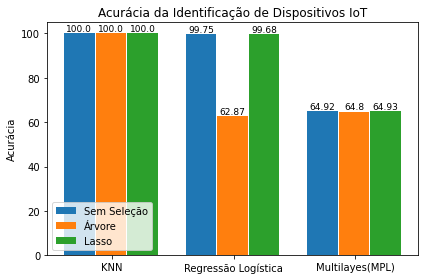

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['KNN', 'Regressão Logística', 'Multilayes(MPL)']
SemSelecao = [round(knnAtaque,2), round(RlAtaque,2), round(MPLAtaque,2)]
Arvore = [round(knnAtaqueArvore,2), round(regressaoaArvore,2), round(MPLAtaqueArvore,2)]
Lasso = [round(knnAtaqueLasso,2), round(RlAtaqueLasso,2), round(MPLAtaqueLasso,2)]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x+width-0.52, SemSelecao, width, label='Sem Seleção')
rects2 = ax.bar(x+width-0.26, Arvore, width, label='Árvore')
rects3 = ax.bar(x+width -0.00, Lasso, width, label='Lasso')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia da Identificação de Dispositivos IoT')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=3)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=9)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

#plt.show()
plt.savefig("Identificação de Ataque.png")